In [2]:
!pip install psycopg2


   ---------------------------------------- 0.0/2.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.7 MB ? eta -:--:--
   --- ------------------------------------ 0.3/2.7 MB ? eta -:--:--
   --- ------------------------------------ 0.3/2.7 MB ? eta -:--:--
   --- ------------------------------------ 0.3/2.7 MB ? eta -:--:--
   ------- -------------------------------- 0.5/2.7 MB 441.3 kB/s eta 0:00:05
   ------- -------------------------------- 0.5/2.7 MB 441.3 kB/s eta 0:00:05
   ----------- ---------------------------- 0.8/2.7 MB 479.2 kB/s eta 0:00:05
   ----------- ---------------------------- 0.8/2.7 MB 479.2 kB/s eta 0:00:05
   ----------- ---------------------------- 0.8/2.7 MB 479.2 kB/s eta 0:00:05
   ----------- ---------------------------- 0.8/2.7 MB 479.2 kB/s eta 0:00:05
   --------------- ------------------------ 1.0/2.7 MB 423.0 kB/s eta 0:00:04
   --------------- ---------------------


[notice] A new release of pip is available: 25.0.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
import psycopg2
import pandas as pd
from sklearn.linear_model import LinearRegression
conn = psycopg2.connect(
    dbname="weatherdb",
    user="user",
    password="password",
    host="localhost",
    port="5432"
)
query = "SELECT * FROM weather_data;"
df = pd.read_sql(query, conn)
conn.close()

C:\Users\hemav\AppData\Local\Temp\ipykernel_11876\3478810558.py:12: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


In [5]:
df

,id,city,temperature,condition,timestamp
0,1,Namakkal,23.7,Clear,2026-01-21 13:43:00.509911
1,2,Namakkal,23.7,Clear,2026-01-21 13:43:01.861644
2,3,Namakkal,23.7,Clear,2026-01-21 13:43:12.552010
3,4,Namakkal,23.7,Clear,2026-01-21 13:43:23.258143
4,5,Namakkal,23.7,Clear,2026-01-21 13:43:33.908327
...,...,...,...,...,...
1574,1575,Namakkal,27.9,Sunny,2026-01-22 06:51:51.971007
1575,1576,Namakkal,27.9,Sunny,2026-01-22 06:52:02.426734
1576,1577,Namakkal,27.9,Sunny,2026-01-22 06:52:13.744052
1577,1578,Namakkal,27.9,Sunny,2026-01-22 06:52:24.070786


In [7]:
df.describe()

,id,temperature,timestamp
count,1579.000000,1579.000000,1579
mean,790.000000,23.833376,2026-01-22 01:24:13.782752
min,1.000000,19.900000,2026-01-21 13:43:00.509911
25%,395.500000,20.600000,2026-01-21 18:03:10.907655
50%,790.000000,23.700000,2026-01-22 04:25:54.493166
75%,1184.500000,26.700000,2026-01-22 05:40:25.918447
max,1579.000000,29.200000,2026-01-22 06:52:34.380154
std,455.962352,2.692113,NaN


In [8]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 1579 entries, 0 to 1578
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   id           1579 non-null   int64         
 1   city         1579 non-null   str           
 2   temperature  1579 non-null   float64       
 3   condition    1579 non-null   str           
 4   timestamp    1579 non-null   datetime64[us]
dtypes: datetime64[us](1), float64(1), int64(1), str(2)
memory usage: 81.8 KB


In [9]:
df.isnull().sum()

id             0
city           0
temperature    0
condition      0
timestamp      0
dtype: int64

<Axes: xlabel='timestamp'>

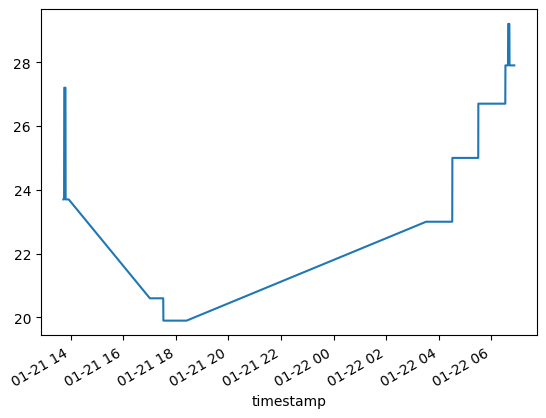

In [10]:
df['timestamp'] = pd.to_datetime(df['timestamp'])
df.set_index('timestamp')['temperature'].plot()


In [12]:
df.columns


Index(['id', 'city', 'temperature', 'condition', 'timestamp'], dtype='str')

In [13]:
df.groupby('condition')['temperature'].mean()


condition
Clear    20.545114
Mist     28.200000
Sunny    25.180357
Name: temperature, dtype: float64

In [16]:
numeric_df = df.select_dtypes(include=['int64', 'float64'])


In [19]:
from sklearn.preprocessing import StandardScaler
x_scaled = StandardScaler().fit_transform(numeric_df)


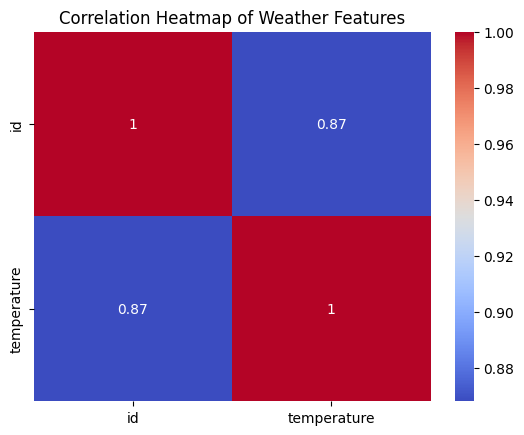

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap of Weather Features")
plt.show()


In [23]:
df[df['temperature'] > df['temperature'].mean() + 2*df['temperature'].std()]


,id,city,temperature,condition,timestamp


In [24]:
df['temp_ma'] = df['temperature'].rolling(window=5).mean()


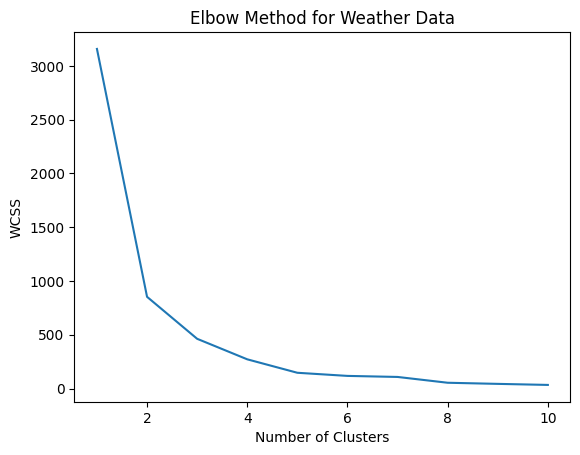

In [25]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(x_scaled)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.title("Elbow Method for Weather Data")
plt.show()


In [26]:
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
weather_clusters = kmeans.fit_predict(x_scaled)


In [28]:
df['hour'] = pd.to_datetime(df['timestamp']).dt.hour
df['day'] = pd.to_datetime(df['timestamp']).dt.day


In [29]:
df['condition_code'] = df['condition'].astype('category').cat.codes


In [30]:
numeric_df = df[['temperature', 'hour', 'day', 'condition_code']]


In [31]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(numeric_df)


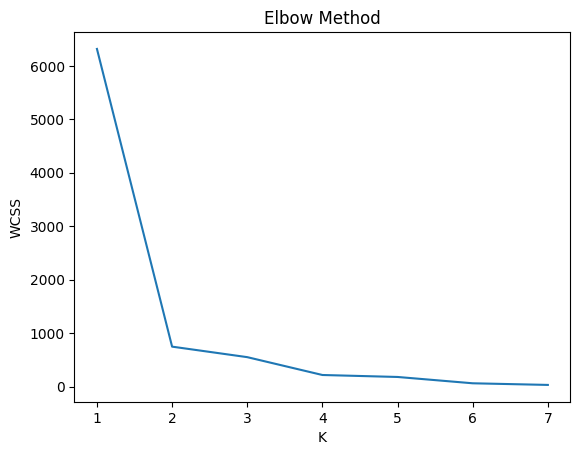

In [32]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

wcss = []
for k in range(1, 8):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(x_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 8), wcss)
plt.title("Elbow Method")
plt.xlabel("K")
plt.ylabel("WCSS")
plt.show()


In [33]:
kmeans = KMeans(n_clusters=3, random_state=42)
df['cluster'] = kmeans.fit_predict(x_scaled)


In [34]:
df.groupby('cluster').mean(numeric_only=True)


,id,temperature,temp_ma,hour,day,condition_code
cluster,,,,,,
0,1039.0,25.243571,25.228770,4.679001,22.0,1.984274
1,284.0,20.162704,20.180420,17.279720,21.0,0.000000
2,35.0,24.562319,24.615385,13.000000,21.0,0.246377
